# S&P Analysis

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline 

from operator import itemgetter
from collections import defaultdict

## Data Preview

In [2]:
df =pd.read_csv(r"E:\DataScience\DataSets\archive (1)\financials.csv")
df.head()

Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92       259.77       175.490  1.387211e+11   
1        1.147959            1.70        68.39        48.925  1.078342e+10   
2        1.908982            0.26        64.60        42.280  1.021210e+11   
3        2.499560            3.29       125.86        60.050  1.813863e+11   
4        1.714470            5.44       162.60       114.820  9.876586e+10   

         EBITDA  Price/Sales  Price/Book  \
0  9.048000e+09     4.390271       11.34   
1  6.010000e+08     3.575483        6.35   
2  5.744000e+09     3.740480        3.19   
3  1.031000e+10     6.291571       26.14   
4  5.643228e+09     2.604117       10.62   

                                         SEC Filings  
0  http://www.sec.gov/cgi-bin/browse-edgar?action...  
1  http://www.sec.gov/cgi-bin/browse-edgar?action...  
2  http://www.sec.gov/cgi-bin/browse-edgar?action...  
3  http://www.sec.gov/cgi-bin/browse-edgar?action...  
4  http://www.sec.gov/cgi-bin/browse-edgar?action...

### Rows & Columns 

In [3]:
df.shape

(505, 14)

### DataTypes

In [4]:
df.dtypes

Symbol             object
Name               object
Sector             object
Price             float64
Price/Earnings    float64
Dividend Yield    float64
Earnings/Share    float64
52 Week Low       float64
52 Week High      float64
Market Cap        float64
EBITDA            float64
Price/Sales       float64
Price/Book        float64
SEC Filings        object
dtype: object

### Description about Dataset

In [5]:
df.describe(include='all')

Symbol        Name                  Sector        Price  \
count     505         505                     505   505.000000   
unique    505         505                      11          NaN   
top       MMM  3M Company  Consumer Discretionary          NaN   
freq        1           1                      84          NaN   
mean      NaN         NaN                     NaN   103.830634   
std       NaN         NaN                     NaN   134.427636   
min       NaN         NaN                     NaN     2.820000   
25%       NaN         NaN                     NaN    46.250000   
50%       NaN         NaN                     NaN    73.920000   
75%       NaN         NaN                     NaN   116.540000   
max       NaN         NaN                     NaN  1806.060000   

        Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
count       503.000000      505.000000      505.000000   505.000000   
unique             NaN             NaN             NaN          NaN   
top                NaN             NaN             NaN          NaN   
freq               NaN             NaN             NaN          NaN   
mean         24.808390        1.895953        3.753743   122.623832   
std          41.241081        1.537214        5.689036   155.362140   
min        -251.530000        0.000000      -28.010000     6.590000   
25%          15.350000        0.794834        1.490000    56.250000   
50%          19.450000        1.769255        2.890000    86.680000   
75%          25.750000        2.781114        5.140000   140.130000   
max         520.150000       12.661196       44.090000  2067.990000   

        52 Week High    Market Cap        EBITDA  Price/Sales   Price/Book  \
count     505.000000  5.050000e+02  5.050000e+02   505.000000   497.000000   
unique           NaN           NaN           NaN          NaN          NaN   
top              NaN           NaN           NaN          NaN          NaN   
freq             NaN           NaN           NaN          NaN          NaN   
mean       83.536616  4.923944e+10  3.590328e+09     3.941705    14.453179   
std       105.725473  9.005017e+10  6.840544e+09     3.460110    89.660508   
min         2.800000  2.626102e+09 -5.067000e+09     0.153186     0.510000   
25%        38.430000  1.273207e+10  7.739320e+08     1.629490     2.020000   
50%        62.850000  2.140095e+10  1.614399e+09     2.896440     3.400000   
75%        96.660000  4.511968e+10  3.692749e+09     4.703842     6.110000   
max      1589.000000  8.095080e+11  7.938600e+10    20.094294  1403.380000   

                                              SEC Filings  
count                                                 505  
unique                                                505  
top     http://www.sec.gov/cgi-bin/browse-edgar?action...  
freq                                                    1  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Checking Null Values

In [6]:
df.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

- There are 2 null values in column Price/Earning(PE ratio) and 8 price/book value

## Data Manipulation

### Printing missing rows in 'Price/Earning' Column

In [7]:
missing_rows_PE = df[df[['Price/Earnings']].isna().any(axis=1)]
print(missing_rows_PE)

    Symbol            Name                  Sector  Price  Price/Earnings  \
360   PRGO         Perrigo             Health Care  84.44             NaN   
430    TPR  Tapestry, Inc.  Consumer Discretionary  48.85             NaN   

     Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
360        0.731261          -28.01        95.93         63.68  1.232638e+10   
430        0.000000            2.09        50.71         36.69  1.424720e+10   

     EBITDA  Price/Sales  Price/Book  \
360     0.0     3.385007        2.03   
430     0.0     4.078549        4.35   

                                           SEC Filings  
360  http://www.sec.gov/cgi-bin/browse-edgar?action...  
430  http://www.sec.gov/cgi-bin/browse-edgar?action...  


- Row number 360 and 430 has a missing values in 'Price/Earnings' column

### Filling the missing values in 'Price/Earnings' column

In [8]:
df['Price/Earnings'] = df['Price/Earnings'].fillna(df['Price/Earnings'].mean())
print(df.isna().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


- Now, there is no missing values in 'Price/Book' column

### Printing missing rows in 'Price/Book' column

In [9]:
missing_rows_PB = df[df[['Price/Book']].isna().any(axis=1)]
print(missing_rows_PB)


    Symbol                  Name                  Sector   Price  \
55    ARNC           Arconic Inc             Industrials   24.45   
199     FL       Foot Locker Inc  Consumer Discretionary   45.88   
225    HCA          HCA Holdings             Health Care   95.97   
292    MRO    Marathon Oil Corp.                  Energy   15.68   
346    OXY  Occidental Petroleum                  Energy   68.47   
358    PEP          PepsiCo Inc.        Consumer Staples  110.15   
450    TDG       TransDigm Group             Industrials  283.00   
460    UNP         Union Pacific             Industrials  124.86   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
55            20.21        0.956175           -0.21        31.17   
199            9.50        2.582795            4.91        77.86   
225           14.07        1.422764            5.94       106.84   
292          -32.00        1.224740           -2.65        19.52   
346          195.63        4.408186           -

- Row number: 55,199,225,292,346,358,450,460 has missing values in 'Price/Book' column

### Filling the missing values in 'Price/Book' column

In [10]:
df['Price/Book'] = df['Price/Book'].fillna(df['Price/Book'].mean())
print(df.isna().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64


- Now, there is no missing values in 'Price/Book' column

## Data Distribution

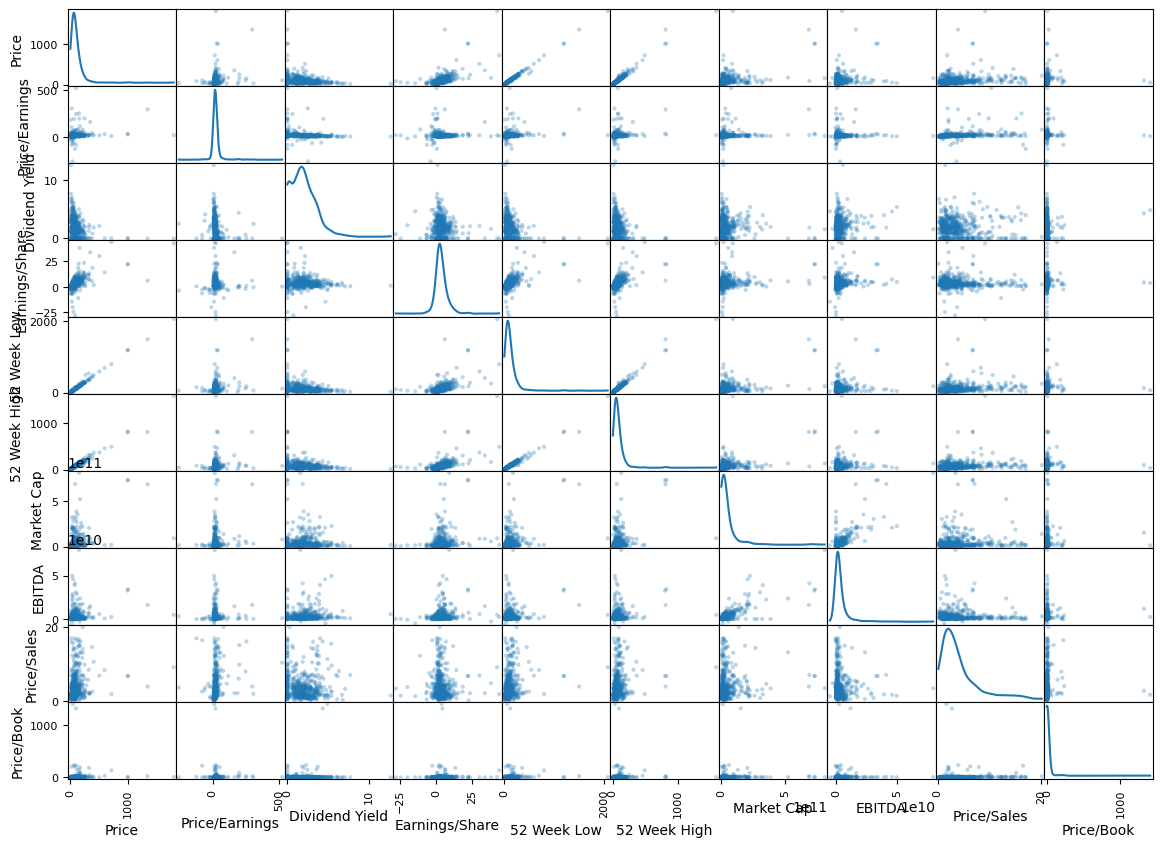

In [11]:
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,10), diagonal = 'kde')
plt.show()

## Prerequisites

In [12]:
#numpy Arrays
sector=np.asarray(df['Sector'])
price=np.asarray(df['Price'])
company=np.asarray(df['Name'])
market_cap=np.asarray(df['Market Cap'])
dividend_yield=np.asarray(df['Dividend Yield'])
price_sales = np.asarray(df['Price/Sales'])
price_earnings = np.asarray(df['Price/Earnings'])
EBITDA = np.asarray(df['EBITDA'])

In [13]:
#Creating Dictionaries
company_sectors = dict(zip(company,sector))
copmany_prices = dict(zip(company,price))
company_market_cap = dict(zip(company,market_cap))
company_dividend_yields = dict(zip(company,dividend_yield))
company_price_sales = dict(zip(company,price_sales))
company_price_earnings = dict(zip(company,price_earnings))
company_ebitda = dict(zip(company, EBITDA))

In [14]:
colors = [
    "#0077b6",  # Strong blue
    "#00b4d8",  # Bright cyan
    "#90e0ef",  # Soft aqua
    "#caf0f8",  # Light sky blue
    "#48cae4",  # Mid cyan
    "#0096c7",  # Ocean blue
    "#023e8a",  # Deep navy
    "#03045e",  # Dark blue
    "#ade8f4",  # Pale cyan
    "#61a5c2",  # Dusty blue
    "#4f759b"   # Muted denim
]

In [15]:
# Number of each Company in each sector
sec=defaultdict(int)
for key, val in company_sectors.items():
    sec[val]+=1

sectors= dict(sec)
pd.DataFrame(sectors.items(), columns=['Sector', 'Company'])

Sector  Company
0                  Industrials       67
1                  Health Care       61
2       Information Technology       70
3       Consumer Discretionary       84
4                    Utilities       28
5                   Financials       68
6                    Materials       25
7                  Real Estate       33
8             Consumer Staples       34
9                       Energy       32
10  Telecommunication Services        3

## Pie Chart

### S&P Sector Breakdown

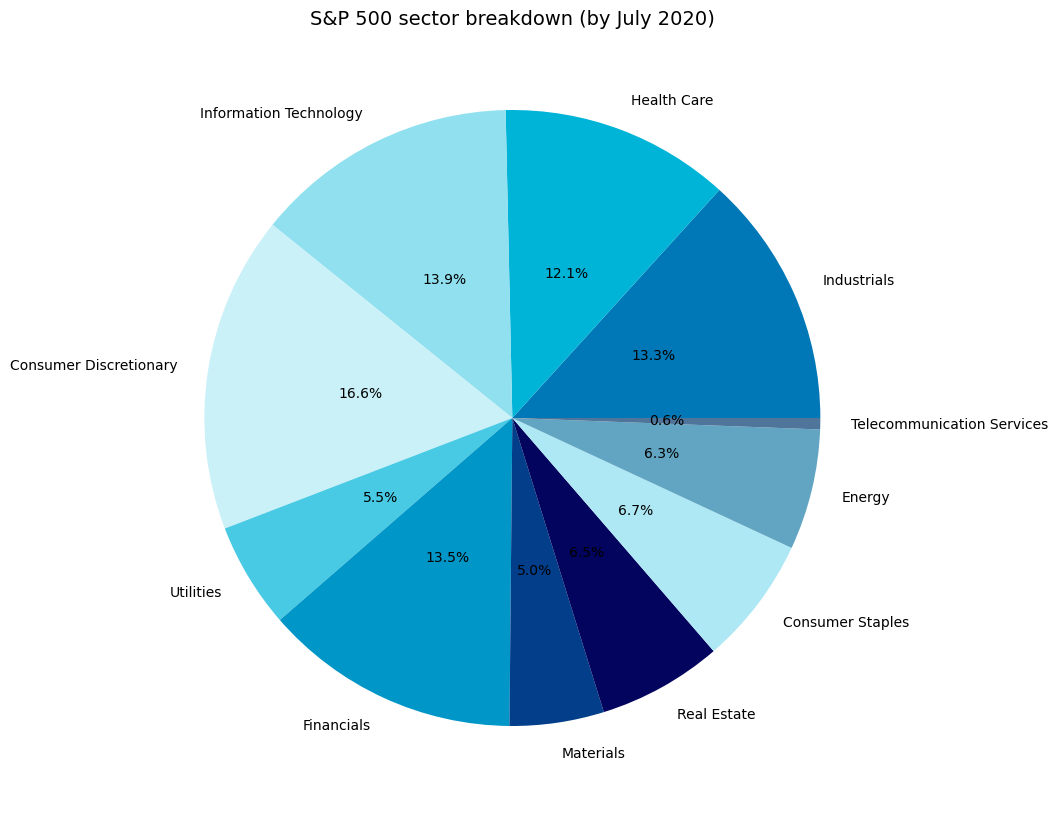

In [16]:
sector_names = list(sectors)
sector_values = list(sectors.values()) 

pie, ax = plt.subplots(figsize=[15,10])
plt.pie(x=sector_values, autopct="%.1f%%", explode=[0.0]*len(sector_values), labels=sector_names, pctdistance=0.5,colors=colors[:len(sector_values)])
plt.title("S&P 500 sector breakdown (by July 2020)", fontsize=14);
plt.show()

In [17]:
# Determining market capitalization of each sector
dfsec = df.groupby(["Sector"]).sum().sort_values("Market Cap", ascending=False) 
dfsec = dfsec[["Market Cap"]].round(1) 
dfsec.reset_index(inplace=True) 
dfsec

Sector    Market Cap
0       Information Technology  6.727122e+12
1                   Financials  3.442649e+12
2                  Health Care  3.244359e+12
3       Consumer Discretionary  3.213563e+12
4                  Industrials  2.411541e+12
5             Consumer Staples  2.087076e+12
6                       Energy  1.357314e+12
7                    Materials  6.923003e+11
8                  Real Estate  6.253157e+11
9                    Utilities  6.116326e+11
10  Telecommunication Services  4.530427e+11

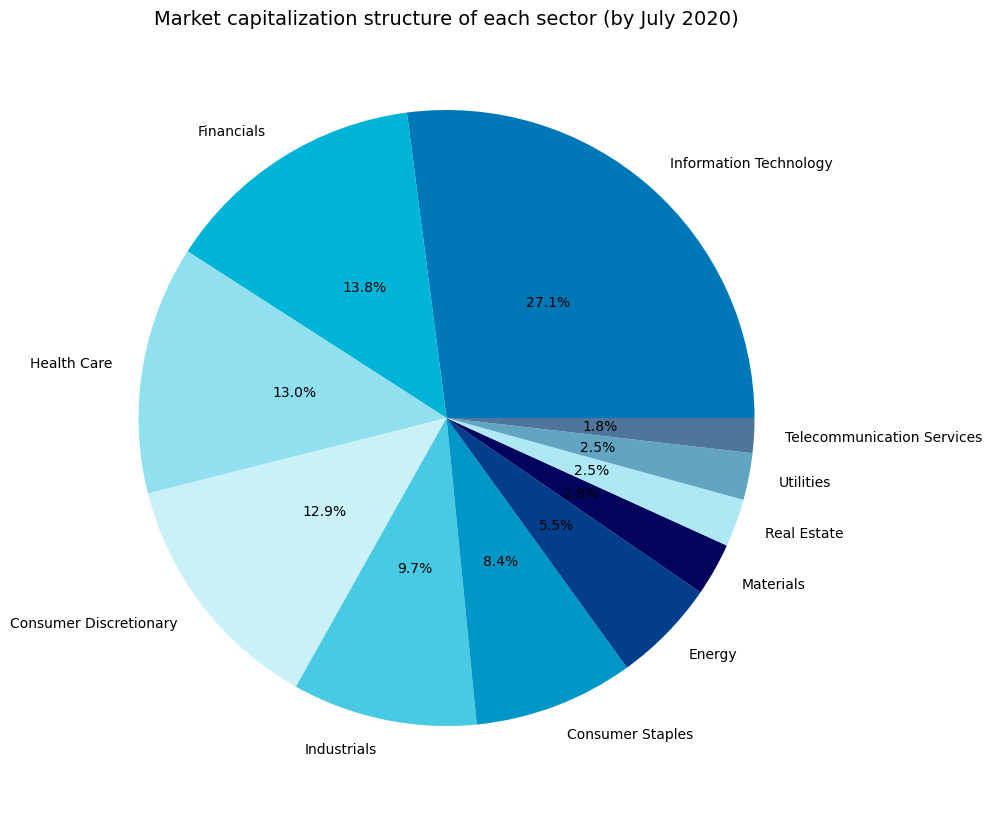

In [18]:
sector_names = list(dfsec['Sector'])
sector_values = list(dfsec['Market Cap'])
pie, ax = plt.subplots(figsize=[15,10])
plt.pie(x=sector_values, autopct="%.1f%%", explode=[0.0]*len(sector_values), labels=sector_names, pctdistance=0.5,colors=colors[:len(sector_values)])
plt.title("Market capitalization structure of each sector (by July 2020)", fontsize=14);
plt.show()


## Bar Plots and Scatter Plots

In [19]:
# Function for determining the belonging of leading companies to each sector
def defining_sectors(top_companies_dict):
    L1 = list(top_companies_dict)
    L2 = list(top_companies_dict.values())
    S = []
    for l in L1:
        sec = company_sectors[l]
        S.append(sec)
    
    data = pd.DataFrame({'Company':L1, 'Sector':S, 'Value':L2})
    return data

### Top 10 Companies by Market Capitalization

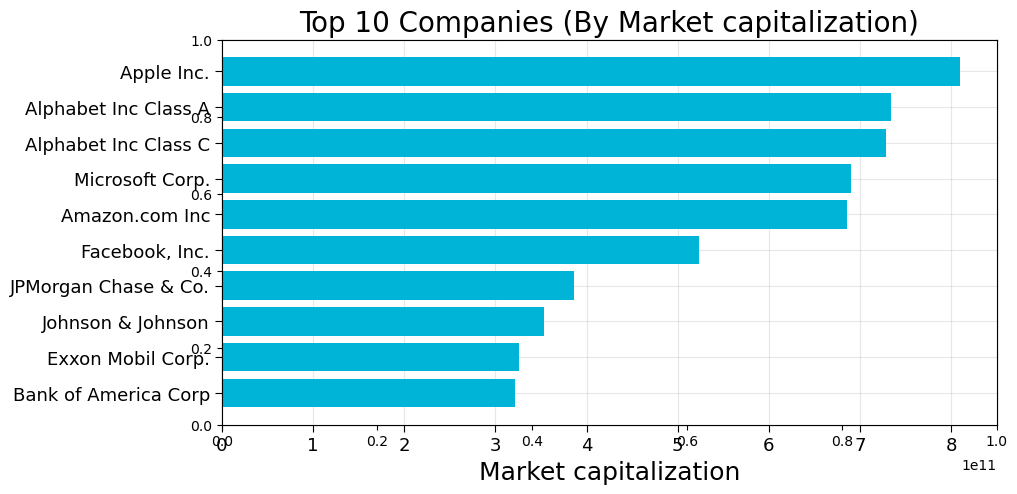

In [20]:
N = 10
top_10_by_market_cap = dict(sorted(company_market_cap.items(), key = itemgetter(1), reverse = True)[:N])

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

x_axis = list(top_10_by_market_cap)
y_axis = list(top_10_by_market_cap.values())

plt.axes(axisbelow=True)
plt.barh(x_axis, y_axis, color="#00b4d8")
plt.gca().invert_yaxis()
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Market capitalization",fontsize=18)
plt.title("Top 10 Companies (By Market capitalization)",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

In [21]:
defining_sectors(top_10_by_market_cap)

Company                  Sector         Value
0            Apple Inc.  Information Technology  8.095080e+11
1  Alphabet Inc Class A  Information Technology  7.338240e+11
2  Alphabet Inc Class C  Information Technology  7.285356e+11
3       Microsoft Corp.  Information Technology  6.899784e+11
4        Amazon.com Inc  Consumer Discretionary  6.858734e+11
5        Facebook, Inc.  Information Technology  5.234230e+11
6  JPMorgan Chase & Co.              Financials  3.866136e+11
7     Johnson & Johnson             Health Care  3.530625e+11
8     Exxon Mobil Corp.                  Energy  3.261487e+11
9  Bank of America Corp              Financials  3.214782e+11

### Top 50 Companies by Market Capitalization

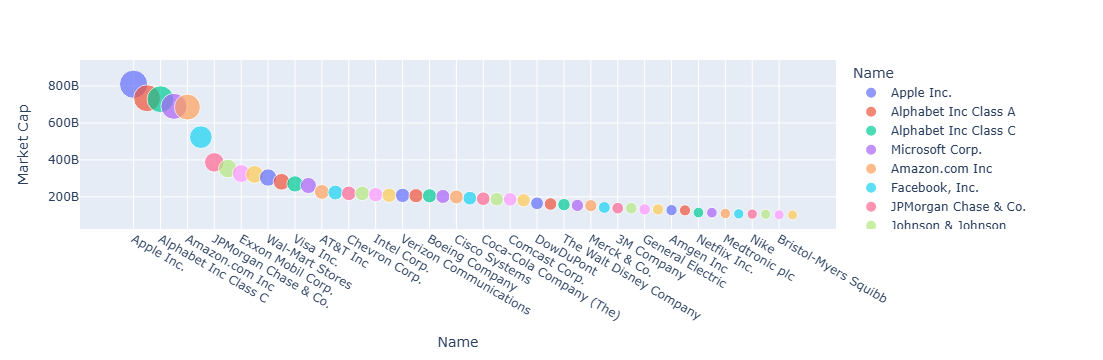

In [22]:
N = 50
top_50_by_market_cap = dict(sorted(company_market_cap.items(), key = itemgetter(1), reverse = True)[:N])
data = pd.DataFrame(top_50_by_market_cap.items(),columns=['Name', 'Market Cap'])
fig = px.scatter(data, x="Name", y="Market Cap", color="Name", size='Market Cap')
fig.show()

### Top 10 Companies by Stock Price Values

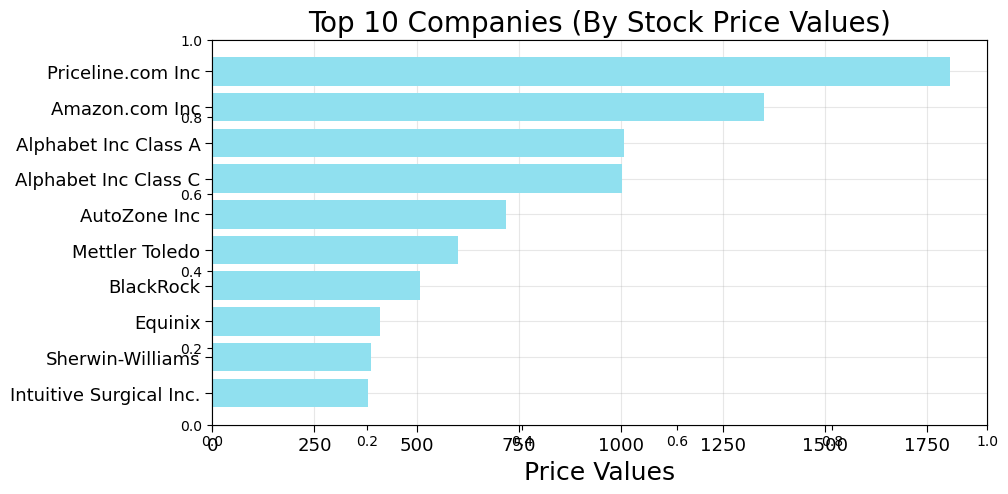

In [23]:
N = 10
top_10_by_price_values = dict(sorted(copmany_prices.items(), key = itemgetter(1), reverse = True)[:N])

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

x_axis = list(top_10_by_price_values)
y_axis = list(top_10_by_price_values.values())

plt.axes(axisbelow=True)
plt.barh(x_axis, y_axis, color="#90e0ef")
plt.gca().invert_yaxis()
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Price Values",fontsize=18)
plt.title("Top 10 Companies (By Stock Price Values)",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

In [24]:
defining_sectors(top_10_by_price_values)

Company                  Sector    Value
0        Priceline.com Inc  Consumer Discretionary  1806.06
1           Amazon.com Inc  Consumer Discretionary  1350.50
2     Alphabet Inc Class A  Information Technology  1007.71
3     Alphabet Inc Class C  Information Technology  1001.52
4             AutoZone Inc  Consumer Discretionary   718.57
5           Mettler Toledo             Health Care   601.00
6                BlackRock              Financials   509.38
7                  Equinix             Real Estate   409.98
8         Sherwin-Williams               Materials   387.65
9  Intuitive Surgical Inc.             Health Care   381.87

### Top 50 Companies by Stock Price Values

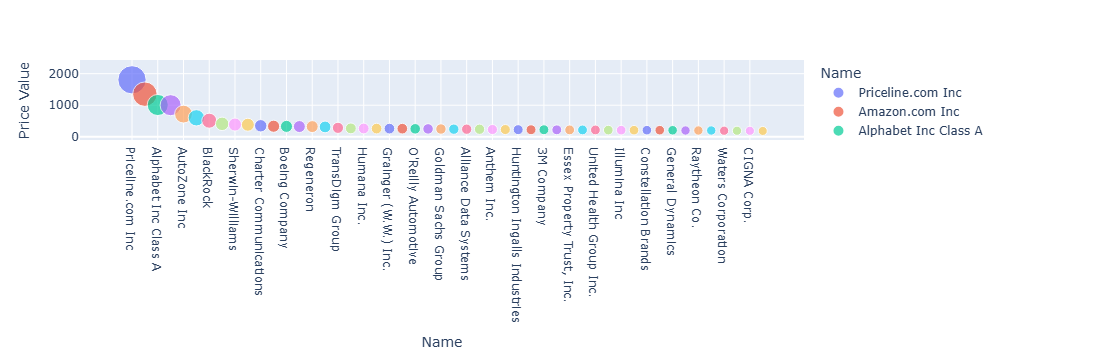

In [25]:
N = 50
top_50_by_price_values = dict(sorted(copmany_prices.items(), key = itemgetter(1), reverse = True)[:N])
sec
data = pd.DataFrame(top_50_by_price_values.items(),columns=['Name', 'Price Value'])
fig = px.scatter(data, x="Name", y="Price Value", color="Name", size='Price Value')
fig.show()

### Top 10 Companies by Dividend Yields

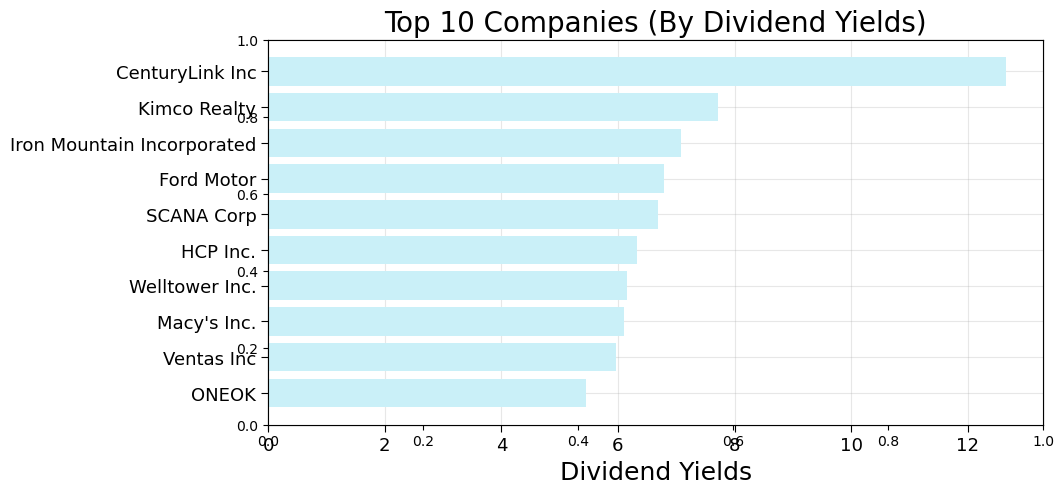

In [26]:
N = 10
top_10_by_dividend_yield = dict(sorted(company_dividend_yields.items(), key = itemgetter(1), reverse = True)[:N])

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

x_axis = list(top_10_by_dividend_yield)
y_axis = list(top_10_by_dividend_yield.values())

plt.axes(axisbelow=True)
plt.barh(x_axis, y_axis, color="#caf0f8")
plt.gca().invert_yaxis()
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Dividend Yields",fontsize=18)
plt.title("Top 10 Companies (By Dividend Yields)",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

In [27]:
defining_sectors(top_10_by_dividend_yield)

Company                      Sector      Value
0             CenturyLink Inc  Telecommunication Services  12.661196
1                Kimco Realty                 Real Estate   7.713499
2  Iron Mountain Incorporated                 Real Estate   7.082580
3                  Ford Motor      Consumer Discretionary   6.784387
4                  SCANA Corp                   Utilities   6.683033
5                    HCP Inc.                 Real Estate   6.330197
6              Welltower Inc.                 Real Estate   6.153846
7                 Macy's Inc.      Consumer Discretionary   6.098546
8                  Ventas Inc                 Real Estate   5.965641
9                       ONEOK                      Energy   5.443620

### Top 50 Companies by Divident Yields

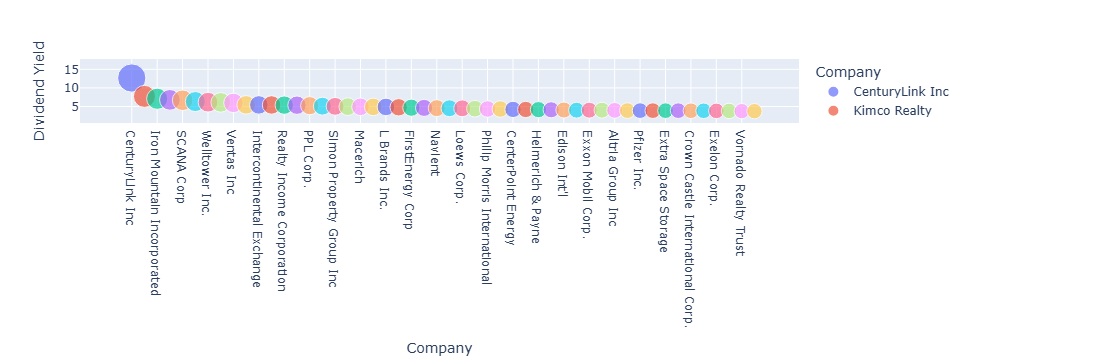

In [28]:
N = 50
top_50_by_dividend_yield = dict(sorted(company_dividend_yields.items(), key = itemgetter(1), reverse = True)[:N])
data = pd.DataFrame(top_50_by_dividend_yield.items(),columns=['Company', 'Dividend Yield'])
fig = px.scatter(data, x="Company", y="Dividend Yield", color="Company", size='Dividend Yield')
fig.show()

### Top 10 Companies by Price/Sales

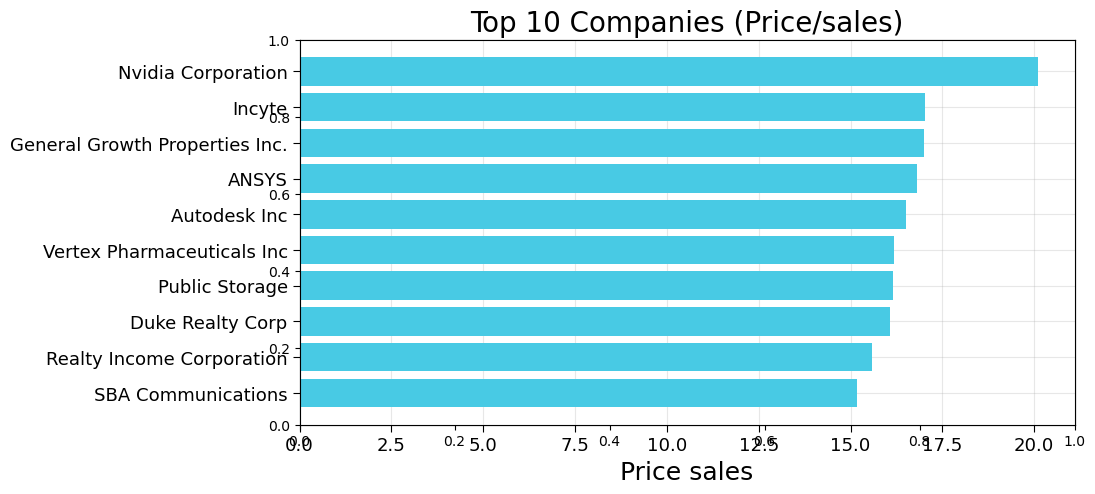

In [29]:
N = 10
top_10_by_price_sales = dict(sorted(company_price_sales.items(), key = itemgetter(1), reverse = True)[:N])

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

x_axis = list(top_10_by_price_sales)
y_axis = list(top_10_by_price_sales.values())

plt.axes(axisbelow=True)
plt.barh(x_axis, y_axis, color="#48cae4")
plt.gca().invert_yaxis()
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Price sales",fontsize=18)
plt.title("Top 10 Companies (Price/sales)",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

In [30]:
defining_sectors(top_10_by_price_sales)

Company                  Sector      Value
0              Nvidia Corporation  Information Technology  20.094294
1                          Incyte             Health Care  17.026990
2  General Growth Properties Inc.             Real Estate  17.003777
3                           ANSYS  Information Technology  16.813400
4                    Autodesk Inc  Information Technology  16.506820
5      Vertex Pharmaceuticals Inc             Health Care  16.185404
6                  Public Storage             Real Estate  16.164170
7                Duke Realty Corp             Real Estate  16.077257
8       Realty Income Corporation             Real Estate  15.588069
9              SBA Communications             Real Estate  15.189207

### Top 50 Companies by Price/Sales

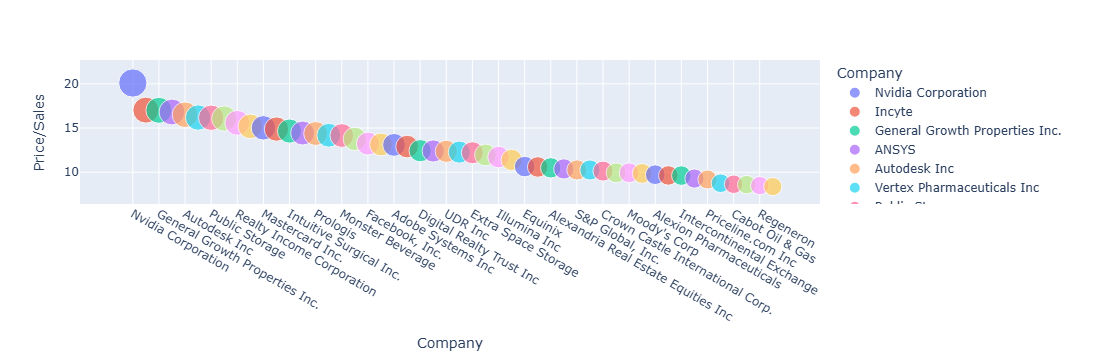

In [31]:
N = 50
top_50_by_price_sales = dict(sorted(company_price_sales.items(), key = itemgetter(1), reverse = True)[:N])
data = pd.DataFrame(top_50_by_price_sales.items(),columns=['Company', 'Price/Sales'])
fig = px.scatter(data, x="Company", y="Price/Sales", color="Company", size='Price/Sales')
fig.show()


### Top 10 Companies by Price/Earnings

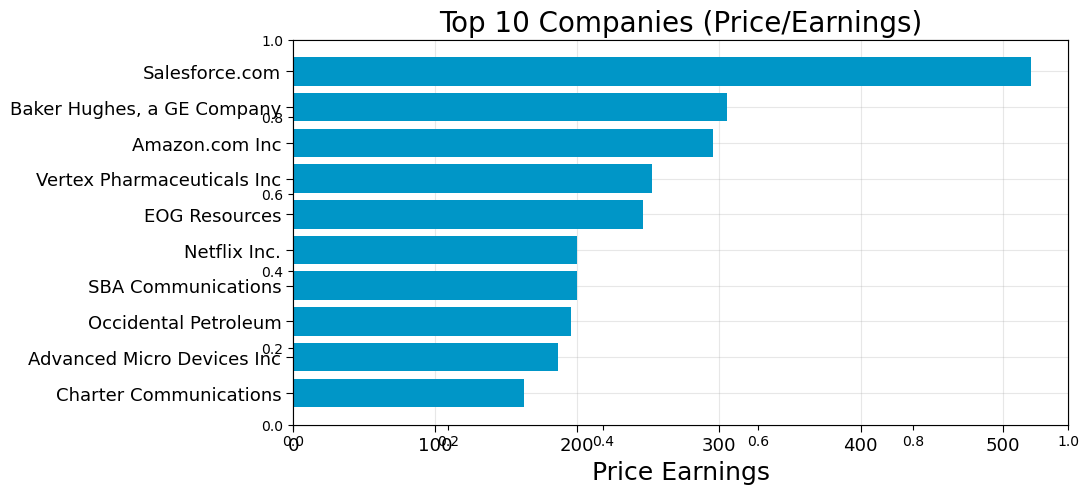

In [32]:
N = 10
top_10_by_price_earnings = dict(sorted(company_price_earnings.items(), key = itemgetter(1), reverse = True)[:N])

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

x_axis = list(top_10_by_price_earnings)
y_axis = list(top_10_by_price_earnings.values())

plt.axes(axisbelow=True)
plt.barh(x_axis, y_axis, color="#0096c7")
plt.gca().invert_yaxis()
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Price Earnings",fontsize=18)
plt.title("Top 10 Companies (Price/Earnings)",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

In [33]:
defining_sectors(top_10_by_price_earnings)

Company                  Sector   Value
0              Salesforce.com  Information Technology  520.15
1  Baker Hughes, a GE Company                  Energy  305.56
2              Amazon.com Inc  Consumer Discretionary  296.16
3  Vertex Pharmaceuticals Inc             Health Care  252.67
4               EOG Resources                  Energy  246.44
5                Netflix Inc.  Information Technology  200.08
6          SBA Communications             Real Estate  199.81
7        Occidental Petroleum                  Energy  195.63
8  Advanced Micro Devices Inc  Information Technology  187.00
9      Charter Communications  Consumer Discretionary  162.92

### Top 50 Companies by Price/Earnings

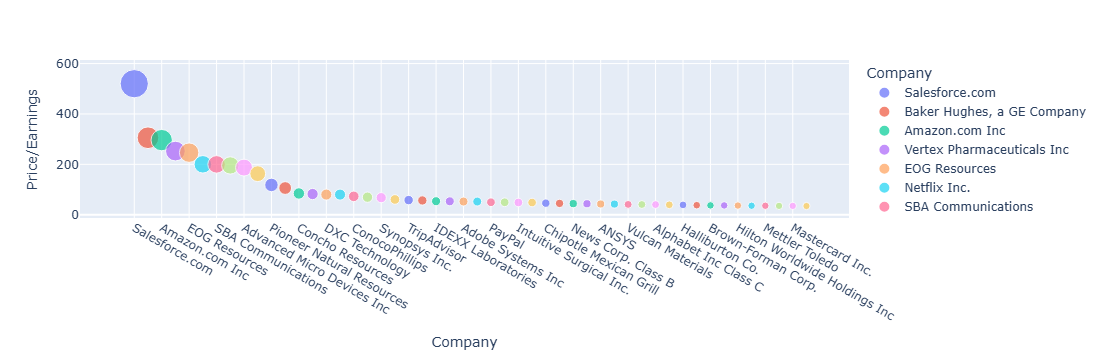

In [34]:
N = 50
top_50_by_price_earnings = dict(sorted(company_price_earnings.items(), key = itemgetter(1), reverse = True)[:N])
data = pd.DataFrame(top_50_by_price_earnings.items(),columns=['Company', 'Price/Earnings'])
fig = px.scatter(data, x="Company", y="Price/Earnings", color="Company", size='Price/Earnings')
fig.show()

### Top 10 Companies by EBITDA

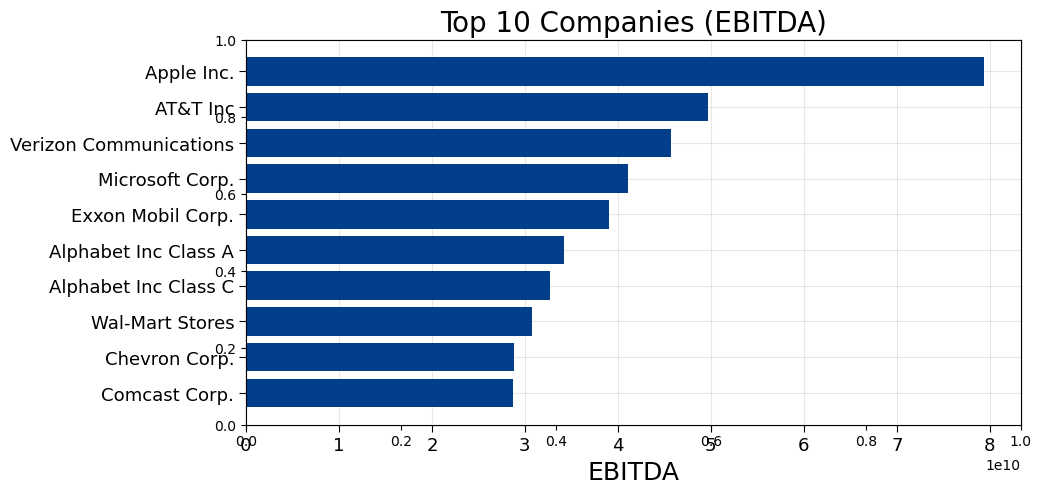

In [35]:
N = 10
top_10_by_EBITDA = dict(sorted(company_ebitda.items(), key = itemgetter(1), reverse = True)[:N])

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

x_axis = list(top_10_by_EBITDA)
y_axis = list(top_10_by_EBITDA.values())

plt.axes(axisbelow=True)
plt.barh(x_axis, y_axis, color="#023e8a")
plt.gca().invert_yaxis()
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("EBITDA",fontsize=18)
plt.title("Top 10 Companies (EBITDA)",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

In [36]:
defining_sectors(top_10_by_EBITDA)

Company                      Sector         Value
0              Apple Inc.      Information Technology  7.938600e+10
1                AT&T Inc  Telecommunication Services  4.965300e+10
2  Verizon Communications  Telecommunication Services  4.574500e+10
3         Microsoft Corp.      Information Technology  4.107900e+10
4       Exxon Mobil Corp.                      Energy  3.905200e+10
5    Alphabet Inc Class A      Information Technology  3.421700e+10
6    Alphabet Inc Class C      Information Technology  3.271400e+10
7         Wal-Mart Stores            Consumer Staples  3.072100e+10
8           Chevron Corp.                      Energy  2.887700e+10
9           Comcast Corp.      Consumer Discretionary  2.867500e+10

### Top 50 Companies by EBITDA

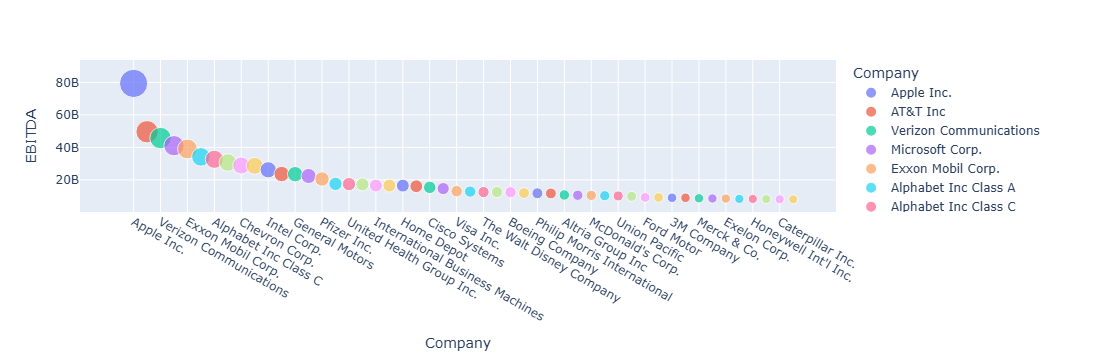

In [37]:
N = 50
top_50_ebitda = dict(sorted(company_ebitda.items(), key = itemgetter(1), reverse = True)[:N])
data = pd.DataFrame(top_50_ebitda.items(),columns=['Company', 'EBITDA'])
fig = px.scatter(data, x="Company", y="EBITDA", color="Company", size='EBITDA')
fig.show()

In [38]:
# Creatiing new data frame to define difference of high and low values of price in 52 weeks

difference = np.asarray(df['52 Week Low'] - df['52 Week High']) # range of stock price in 52 weeks (max - min)
Low = np.asarray(df['52 Week Low'])
High = np.asarray(df['52 Week High'])

new_df = pd.DataFrame({'Company':company,
                        'Sector':sector,
                        'Price':price,
                        '52 Week Low':Low,
                        '52 Week High':High,
                        'Stock Growth':difference})

new_df.head()

Company                  Sector   Price  52 Week Low  \
0           3M Company             Industrials  222.89       259.77   
1      A.O. Smith Corp             Industrials   60.24        68.39   
2  Abbott Laboratories             Health Care   56.27        64.60   
3          AbbVie Inc.             Health Care  108.48       125.86   
4        Accenture plc  Information Technology  150.51       162.60   

   52 Week High  Stock Growth  
0       175.490        84.280  
1        48.925        19.465  
2        42.280        22.320  
3        60.050        65.810  
4       114.820        47.780

### Top 10 Companies in the Growth of Stock Quotes in 52 weeks

In [39]:
new_df = new_df.groupby(["Company","Sector"]).sum().sort_values("Stock Growth", ascending=False) 
new_df = new_df[["Stock Growth"]].round(1) 
new_df.reset_index(inplace=True) 
new_df.head(10)

Company                  Sector  Stock Growth
0           Amazon.com Inc  Consumer Discretionary         685.5
1        Priceline.com Inc  Consumer Discretionary         479.0
2     Alphabet Inc Class C  Information Technology         383.7
3     Alphabet Inc Class A  Information Technology         373.7
4             AutoZone Inc  Consumer Discretionary         306.8
5           Mettler Toledo             Health Care         237.9
6   Chipotle Mexican Grill  Consumer Discretionary         236.0
7                BlackRock              Financials         226.5
8                Regeneron             Health Care         224.1
9  Intuitive Surgical Inc.             Health Care         218.9

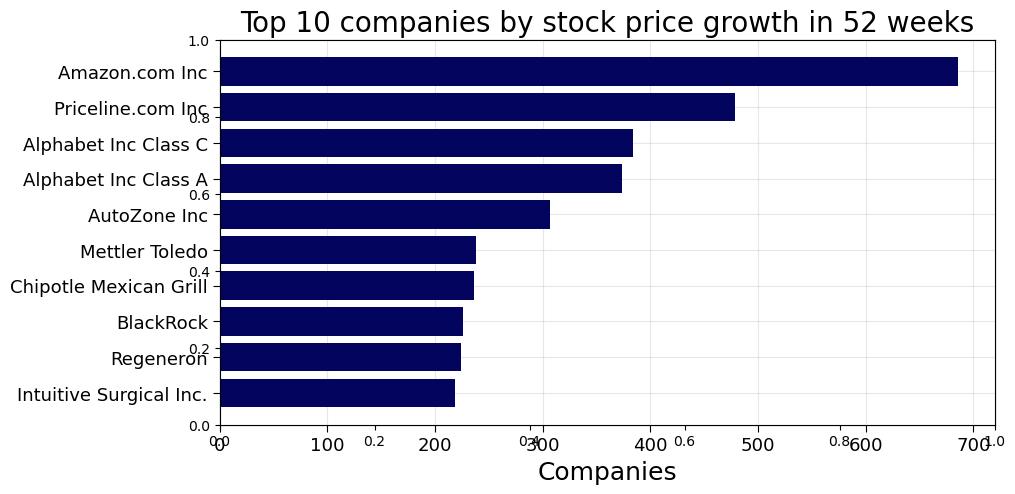

In [40]:
arr1, arr2 = np.asarray(new_df['Company']), np.asarray(new_df['Stock Growth'])
D = dict(zip(arr1,arr2))

N = 10
top_10_stock_grouth = dict(sorted(D.items(), key = itemgetter(1), reverse = True)[:N])

f = plt.figure(figsize=(10,5))
f.add_subplot(111)

x_axis = list(top_10_stock_grouth)
y_axis = list(top_10_stock_grouth.values())

plt.axes(axisbelow=True)
plt.barh(x_axis, y_axis, color="#03045e")
plt.gca().invert_yaxis()
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Companies",fontsize=18)
plt.title("Top 10 companies by stock price growth in 52 weeks",fontsize=20)
plt.grid(alpha=0.3)
plt.show()

## Defining a new type of variables using financial formulas and adding them to our dataframe

In [41]:
df['Annual earnings per share'] = df['Price']/df['Price/Earnings']
df['Number of Shares Outstanding'] = df['Market Cap']/df['Price']
df['Net Profit'] = df['Number of Shares Outstanding'] * df['Earnings/Share']
df['Stock Grouth'] = df['52 Week Low'] - df['52 Week High']
df['Book Value'] = df['Price/Book'] * df['Market Cap']
df['Annual Revenue'] = df['Price/Sales'] * df['Market Cap']
df = df.drop(columns='SEC Filings')
df.head()

Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92       259.77       175.490  1.387211e+11   
1        1.147959            1.70        68.39        48.925  1.078342e+10   
2        1.908982            0.26        64.60        42.280  1.021210e+11   
3        2.499560            3.29       125.86        60.050  1.813863e+11   
4        1.714470            5.44       162.60       114.820  9.876586e+10   

         EBITDA  Price/Sales  Price/Book  Annual earnings per share  \
0  9.048000e+09     4.390271       11.34                   9.168655   
1  6.010000e+08     3.575483        6.35                   2.170029   
2  5.744000e+09     3.740480        3.19                   2.499778   
3  1.031000e+10     6.291571       26.14                   5.588872   
4  5.643228e+09     2.604117       10.62                   5.909305   

   Number of Shares Outstanding    Net Profit  Stock Grouth    Book Value  \
0                  6.223745e+08  4.929206e+09        84.280  1.573097e+12   
1                  1.790076e+08  3.043130e+08        19.465  6.847472e+10   
2                  1.814840e+09  4.718584e+08        22.320  3.257661e+11   
3                  1.672072e+09  5.501116e+09        65.810  4.741439e+12   
4                  6.562079e+08  3.569771e+09        47.780  1.048893e+12   

   Annual Revenue  
0    6.090230e+11  
1    3.855593e+10  
2    3.819818e+11  
3    1.141205e+12  
4    2.571978e+11

In [42]:
# Assistant
# Correlation analysis of our new data frame
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation on numeric columns only
numeric_df.corr().style.background_gradient(cmap='Blues').format("{:.3f}")